In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.metrics import plot_confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv(r'C:\Users\gauri\Documents\Heart_project\artifacts\heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [34]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [35]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=0.2,stratify=y)

In [6]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
model.score(x_train,y_train)

1.0

In [8]:
x_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
43    53    0   0       130   264    0        0      143      0      0.4   
48    53    0   2       128   216    0        0      115      0      0.0   
89    58    0   0       100   248    0        0      122      0      1.0   
239   35    1   0       126   282    0        0      156      1      0.0   
80    41    1   2       112   250    0        1      179      0      0.0   

     slope  ca  thal  
43       1   0     2  
48       2   0     0  
89       1   0     2  
239      2   0     3  
80       2   0     2

In [9]:

y_train.value_counts()

target
1    132
0    110
Name: count, dtype: int64

In [10]:
model.score(x_test,y_test)

0.7704918032786885

In [47]:
plt.figure(figsize=(200,150))
features=df.columns.tolist() 
tree = plot_tree(model, feature_names=features, class_names=['0','1'], filled=True)

In [11]:
s=model.feature_importances_
s

array([0.08758658, 0.        , 0.28527701, 0.03043939, 0.11753403,
       0.        , 0.04164502, 0.07742266, 0.01743061, 0.08374084,
       0.035     , 0.11467865, 0.10924519])

In [12]:
s1=pd.Series(s,index=x.columns)
s1.sort_values()

sex         0.000000
fbs         0.000000
exang       0.017431
trestbps    0.030439
slope       0.035000
restecg     0.041645
thalach     0.077423
oldpeak     0.083741
age         0.087587
thal        0.109245
ca          0.114679
chol        0.117534
cp          0.285277
dtype: float64

<Axes: >

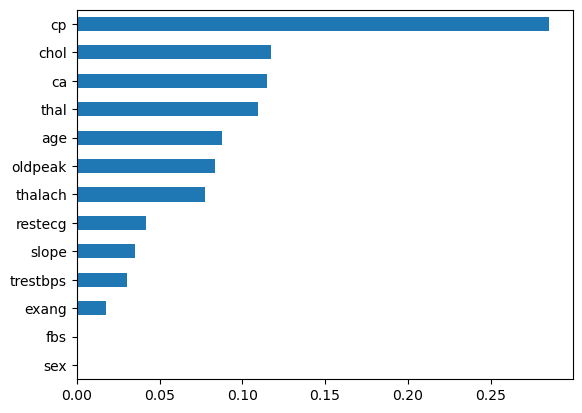

In [13]:
s1=pd.Series(s,index=x.columns)
s1.sort_values().plot(kind='barh')

In [14]:
#Testing data Accuracy
model=DecisionTreeClassifier(random_state=20)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*30)

accuracy=accuracy_score(y_test,y_pred)
print("Testing Accuracy is:",accuracy)
print("*"*30)

clf_report=classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[20  8]
 [ 4 29]]
******************************
Testing Accuracy is: 0.8032786885245902
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [15]:
#Training data accuracy
y_train_pred=model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*30)

accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy:\n",accuracy)
print("*"*30)

clf_report=classification_report(y_train,y_train_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix:
 [[110   0]
 [  0 132]]
******************************
Accuracy:
 1.0
******************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### Hyperparameter Tunning

In [16]:
model = DecisionTreeClassifier(random_state=20)
Hyperparameters = {"criterion" : ['entropy', 'gini'],
                  "max_depth" : np.arange(5,10),
                  "min_samples_split":np.arange(5,10),
                  "min_samples_leaf":np.arange(3,10)
                  }

gscv_model = GridSearchCV(model, Hyperparameters, cv = 5)
gscv_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])})

In [17]:
gscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9,
                       min_samples_split=5, random_state=20)

In [18]:
gscv_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 5}

In [19]:
#Testing data Accuracy
#model=DecisionTreeClassifier(random_state=20)
model=DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=9,
                            min_samples_split=5,random_state=20)
model=gscv_model.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy is :",accuracy)
print("*"*30)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[23  5]
 [ 4 29]]
******************************
Testing Accuracy is : 0.8524590163934426
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [20]:
#Training data accuracy
y_pred_train=model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

accuracy = accuracy_score(y_train, y_pred_train)
print("Testing Accuracy is :",accuracy)
print("*"*30)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[ 94  16]
 [ 18 114]]
******************************
Testing Accuracy is : 0.859504132231405
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.88      0.86      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [21]:
plt.figure(figsize=(200,150))
features=df.columns.tolist() 
tree = plot_tree(model, feature_names=features, class_names=['0','1'], filled=True)

<Axes: >

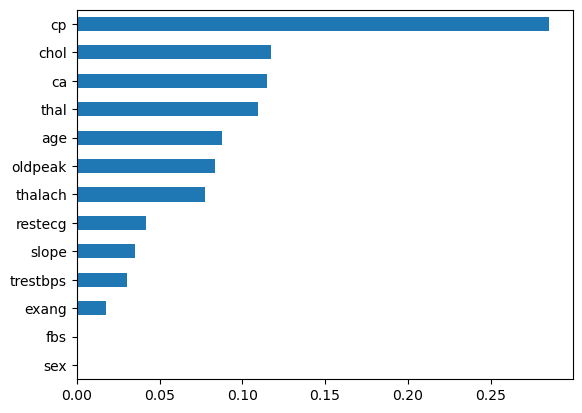

In [22]:
s2=pd.Series(s,index=x.columns)
s2.sort_values().plot(kind='barh')

In [23]:
df.replace({'target':{0:"no",1:"yes"}},inplace=True)

In [24]:
import pickle

In [25]:
pickle.dump(model,open(r'C:\Users\gauri\Documents\Heart_project\artifacts\model.pkl', 'wb'))

In [26]:
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
43    53    0   0       130   264    0        0      143      0      0.4   
48    53    0   2       128   216    0        0      115      0      0.0   
89    58    0   0       100   248    0        0      122      0      1.0   
239   35    1   0       126   282    0        0      156      1      0.0   
80    41    1   2       112   250    0        1      179      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
268   54    1   0       122   286    0        0      116      1      3.2   
93    54    0   1       132   288    1        0      159      1      0.0   
262   53    1   0       123   282    0        1       95      1      2.0   
181   65    0   0       150   225    0        0      114      0      1.0   
16    58    0   2       120   340    0        1      172      0      0.0   

     slope  ca  thal  
43       1   0     2  
48       2   0     0  
89       1   0     2  
239      2   0     3  
80       2   0     2  
..     ...  ..   ...  
268      1   2     2  
93       2   1     2  
262      1   2     3  
181      1   3     3  
16       2   0     2  

[242 rows x 13 columns]

In [27]:
age=53
sex=0
cp=0
trestbps=130
chol=264
fbs=0
restecg=0
thalach=143
exang=0
oldpeak=0.4
slope=1
ca=0
tha=2


In [28]:
result = model.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,tha]])

C:\Users\gauri\OneDrive\Desktop\Newfolder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
df['target'][result]

1    yes
Name: target, dtype: object

In [30]:
df['target'].value_counts()

target
yes    165
no     138
Name: count, dtype: int64